In [181]:
import numpy as np
import seaborn as sns
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [182]:
#pip install netCDF4

In [183]:
data0 ="chirps_1985_2004_remapnn_Kigali.nc"
ncin0 = Dataset(data0)
precip0  = ncin0.variables['precip'][:,:,:] 
lat  = ncin0.variables['lat'][:]
time =ncin0.variables['time'][:]
lon  = ncin0.variables['lon'][:]
ncin0.close()
nt,nlat,nlon = precip0.shape


In [184]:
print(nt,nlat,nlon)

20 1 1


In [185]:
precipitation=SAT0.flatten()
print(precipitation)

[ 0.71755165 -0.18599972  0.2696255   0.8752842   0.43816242  0.64033055
 -0.23467943 -1.589271   -1.3496654   0.9738017  -0.27076268 -0.79767853
  0.9936196   0.98595434 -1.4206723  -1.9081683   1.5552777  -0.18511577
 -0.69085574  1.1832612 ]


In [186]:
tim= time.flatten()
tim

masked_array(data=[2007.75, 2372.75, 2737.75, 3103.75, 3468.75, 3833.75,
                   4198.75, 4564.75, 4929.75, 5294.75, 5659.75, 6025.75,
                   6390.75, 6755.75, 7120.75, 7486.75, 7851.75, 8216.75,
                   8581.75, 8947.75],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [187]:


# initialise data of lists.

Dictionary = {"years":[1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004],'precipAnnomalies':precipitation}
 
# Create DataFrame

T2M = pd.DataFrame(Dictionary)

 
# Print the output.

print(T2M)

    years  precipAnnomalies
0    1985          0.717552
1    1986         -0.186000
2    1987          0.269626
3    1988          0.875284
4    1989          0.438162
5    1990          0.640331
6    1991         -0.234679
7    1992         -1.589271
8    1993         -1.349665
9    1994          0.973802
10   1995         -0.270763
11   1996         -0.797679
12   1997          0.993620
13   1998          0.985954
14   1999         -1.420672
15   2000         -1.908168
16   2001          1.555278
17   2002         -0.185116
18   2003         -0.690856
19   2004          1.183261


In [188]:
r1=T2M["years"]
r2=T2M["precipAnnomalies"]

In [189]:
T2M['positive'] = T2M['precipAnnomalies'] > 0

In [190]:
TX=T2M.set_index('years')
TX

,precipAnnomalies,positive
years,,
1985,0.717552,True
1986,-0.186000,False
1987,0.269626,True
1988,0.875284,True
1989,0.438162,True
1990,0.640331,True
1991,-0.234679,False
1992,-1.589271,False
1993,-1.349665,False


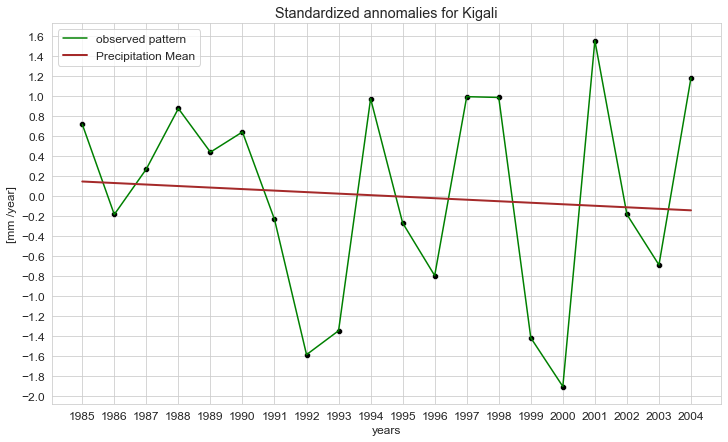

In [191]:
plt.figure(figsize=(12,7))

sns.set_style("whitegrid")
ax1 = sns.lineplot(x=r1, y=r2, data=T2M,color="green",label="observed pattern")
ax1 = sns.scatterplot(x=r1, y=r2, data=T2M,color="k")
ax1.set_xticks(range(1985,2005,1))
ax1.set_yticks(np.arange(-2,2.2,0.2))
ax1.set(xlabel="years",ylabel="[mm /year]")
y1=T2M["years"]
y2=T2M["precipAnnomalies"]
z4=np.polyfit(y1,y2,1) 
p =z4[0]*y1+z4[1]
sns.lineplot(x=y1,y=p,color="brown",label="Precipitation Mean",linewidth= 2);
plt.title("Standardized annomalies for Kigali");

In [192]:
z4

array([-1.51907169e-02,  3.02978849e+01])

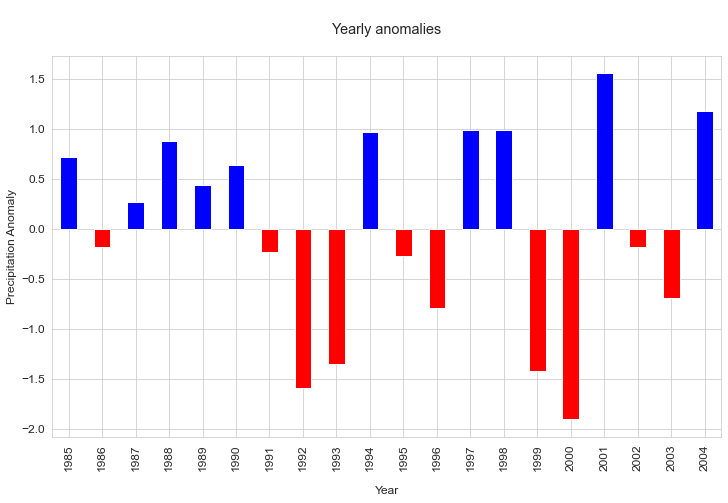

In [194]:

TX['precipAnnomalies'].plot(
    figsize=(12,7),
    kind='bar',
    color=TX.positive.map({True: 'blue', False: 'red'}),
    fontsize=12,
    xlabel='\nYear',
    ylabel='Precipitation Anomaly',
    title='\nYearly anomalies\n',
    );